In [1]:
import sys

sys.path.append('/home/afahim2/tmp/clip-project/clipverse')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
clip_benchmarks_path = '/home/afahim2/tmp/clip-project/clipverse/clip_benchmarks2.csv'

df = pd.read_csv(clip_benchmarks_path)

df.head()

,acc1,model,acc5,task,model_fullname,pretrained,mean_average_precision,image_retrieval_recall@5,mean_per_class_recall,text_retrieval_recall@5,dataset,language
0,0.016540,ft_clip,0.083572,zeroshot_classification,ft_clip mscoco_cua_128d_s24,mscoco_cua_128d_s24,NaN,NaN,0.017628,NaN,wds/cars,en
1,0.019276,ft_clip,0.097127,zeroshot_classification,ft_clip mscoco_cua_128d_s42,mscoco_cua_128d_s42,NaN,NaN,0.018942,NaN,wds/cars,en
2,0.022634,ft_clip,0.102102,zeroshot_classification,ft_clip mscoco_cua_128d_s44,mscoco_cua_128d_s44,NaN,NaN,0.023542,NaN,wds/cars,en
3,0.014053,ft_clip,0.065042,zeroshot_classification,ft_clip mscoco_cua_32d_s24,mscoco_cua_32d_s24,NaN,NaN,0.014092,NaN,wds/cars,en
4,0.018281,ft_clip,0.074120,zeroshot_classification,ft_clip mscoco_cua_32d_s42,mscoco_cua_32d_s42,NaN,NaN,0.017808,NaN,wds/cars,en


In [5]:
# add a dimensionality column
df['dim'] = df['pretrained'].apply(lambda x: int(x.split('_')[2].split('d')[0]))



# add loss name
df['loss_name'] = df['pretrained'].apply(lambda x: x.split('_')[1])

# add dataset name
df['finetune_dataset'] = df['pretrained'].apply(lambda x: x.split('_')[0])


# add seed
df['seed'] = df['pretrained'].apply(lambda x: x.split('_')[3].split('s')[1])



df.head()

,acc1,model,acc5,task,model_fullname,pretrained,mean_average_precision,image_retrieval_recall@5,mean_per_class_recall,text_retrieval_recall@5,dataset,language,dim,loss_name,finetune_dataset,seed
0,0.016540,ft_clip,0.083572,zeroshot_classification,ft_clip mscoco_cua_128d_s24,mscoco_cua_128d_s24,NaN,NaN,0.017628,NaN,wds/cars,en,128,cua,mscoco,24
1,0.019276,ft_clip,0.097127,zeroshot_classification,ft_clip mscoco_cua_128d_s42,mscoco_cua_128d_s42,NaN,NaN,0.018942,NaN,wds/cars,en,128,cua,mscoco,42
2,0.022634,ft_clip,0.102102,zeroshot_classification,ft_clip mscoco_cua_128d_s44,mscoco_cua_128d_s44,NaN,NaN,0.023542,NaN,wds/cars,en,128,cua,mscoco,44
3,0.014053,ft_clip,0.065042,zeroshot_classification,ft_clip mscoco_cua_32d_s24,mscoco_cua_32d_s24,NaN,NaN,0.014092,NaN,wds/cars,en,32,cua,mscoco,24
4,0.018281,ft_clip,0.074120,zeroshot_classification,ft_clip mscoco_cua_32d_s42,mscoco_cua_32d_s42,NaN,NaN,0.017808,NaN,wds/cars,en,32,cua,mscoco,42


In [6]:
# filter to keep only mscoco finetuned_dataset
df = df[df['finetune_dataset'] == 'mscoco']


In [11]:
# group df rows by loss_name, dimensionality, keep all rows as a list

df_grouped = df.groupby(['loss_name', 'dim']).agg(list).reset_index()

df_grouped.head()



,loss_name,dim,acc5,text_retrieval_recall@5,pretrained,model_fullname,image_retrieval_recall@5,mean_average_precision,acc1,dataset,task,language,model,mean_per_class_recall,finetune_dataset
0,cua,32,"[0.0650416614848899, 0.0865563984579032, 0.057...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.693...","[mscoco_cua_32d_s24, mscoco_cua_32d_s44, mscoc...","[ft_clip mscoco_cua_32d_s24, ft_clip mscoco_cu...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.627...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.014052978485263, 0.014052978485263, 0.01407...","[wds/cars, wds/cars, wds/country211, wds/count...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en, en, en, en, en, en, e...","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.0140923083868838, 0.014622522291814, 0.0140...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoc..."
1,cua,64,"[0.0819549807237905, 0.0663507109004739, 0.742...","[nan, nan, nan, nan, 0.7310000061988831, 0.741...","[mscoco_cua_64d_s24, mscoco_cua_64d_s24, mscoc...","[ft_clip mscoco_cua_64d_s24, ft_clip mscoco_cu...","[nan, nan, nan, nan, 0.6585999727249146, 0.649...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0190274841437632, 0.0174881516587677, 0.168...","[wds/cars, wds/country211, wds/fer2013, wds/fg...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en, en, en, en, en, en, e...","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.0196202288112038, 0.0174881516587677, 0.194...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoc..."
2,cua,128,"[0.0835716950628031, 0.0612322274881516, 0.801...","[nan, nan, nan, nan, 0.75, 0.7549999952316284,...","[mscoco_cua_128d_s24, mscoco_cua_128d_s24, msc...","[ft_clip mscoco_cua_128d_s24, ft_clip mscoco_c...","[nan, nan, nan, nan, 0.6674000024795532, 0.668...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0165402313145131, 0.0140284360189573, 0.292...","[wds/cars, wds/country211, wds/fer2013, wds/fg...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en, en, en, en, en, en, e...","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.0176279777822403, 0.0140284360189573, 0.204...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoc..."
3,cuaxu,32,"[0.0600671558263897, 0.0695187165775401, 0.056...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.685...","[mscoco_cuaxu_32d_s24, mscoco_cuaxu_32d_s44, m...","[ft_clip mscoco_cuaxu_32d_s24, ft_clip mscoco_...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.630...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0118144509389379, 0.0136798905608755, 0.013...","[wds/cars, wds/cars, wds/country211, wds/count...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en, en, en, en, en, en, e...","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.0116624476074023, 0.0132461004663612, 0.013...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoc..."
4,cuaxu,64,"[0.0757368486506653, 0.0672037914691943, 0.763...","[nan, nan, nan, nan, 0.7509999871253967, 0.728...","[mscoco_cuaxu_64d_s24, mscoco_cuaxu_64d_s24, m...","[ft_clip mscoco_cuaxu_64d_s24, ft_clip mscoco_...","[nan, nan, nan, nan, 0.6696000099182129, 0.641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0181569456535256, 0.0181516587677725, 0.197...","[wds/cars, wds/country211, wds/fer2013, wds/fg...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en, en, en, en, en, en, e...","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.0182240299670132, 0.0182464454976303, 0.181...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoc..."


In [50]:
# filter dataset which contains the string imagenet

df_imagenet = df[df['dataset'].str.contains('imagenet')]
df_imagenet

,acc5,text_retrieval_recall@5,pretrained,model_fullname,image_retrieval_recall@5,mean_average_precision,acc1,dataset,task,language,model,mean_per_class_recall,dim,loss_name,finetune_dataset
111,0.251333,NaN,mscoco_cua_128d_s24,ft_clip mscoco_cua_128d_s24,NaN,NaN,0.081333,wds/imagenet-a,zeroshot_classification,en,ft_clip,0.103503,128,cua,mscoco
112,0.258667,NaN,mscoco_cua_128d_s44,ft_clip mscoco_cua_128d_s44,NaN,NaN,0.082400,wds/imagenet-a,zeroshot_classification,en,ft_clip,0.104648,128,cua,mscoco
113,0.232400,NaN,mscoco_cua_32d_s24,ft_clip mscoco_cua_32d_s24,NaN,NaN,0.076000,wds/imagenet-a,zeroshot_classification,en,ft_clip,0.095111,32,cua,mscoco
114,0.217867,NaN,mscoco_cua_32d_s44,ft_clip mscoco_cua_32d_s44,NaN,NaN,0.067067,wds/imagenet-a,zeroshot_classification,en,ft_clip,0.085125,32,cua,mscoco
115,0.253067,NaN,mscoco_cua_64d_s24,ft_clip mscoco_cua_64d_s24,NaN,NaN,0.074800,wds/imagenet-a,zeroshot_classification,en,ft_clip,0.091727,64,cua,mscoco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.301700,NaN,mscoco_default_32d_s42,ft_clip mscoco_default_32d_s42,NaN,NaN,0.122000,wds/imagenetv2,zeroshot_classification,en,ft_clip,0.122200,32,default,mscoco
221,0.282800,NaN,mscoco_default_32d_s44,ft_clip mscoco_default_32d_s44,NaN,NaN,0.107000,wds/imagenetv2,zeroshot_classification,en,ft_clip,0.106700,32,default,mscoco
222,0.327600,NaN,mscoco_default_64d_s24,ft_clip mscoco_default_64d_s24,NaN,NaN,0.133700,wds/imagenetv2,zeroshot_classification,en,ft_clip,0.133200,64,default,mscoco
223,0.330800,NaN,mscoco_default_64d_s42,ft_clip mscoco_default_64d_s42,NaN,NaN,0.131800,wds/imagenetv2,zeroshot_classification,en,ft_clip,0.131800,64,default,mscoco


In [56]:
df_imagenet_grouped = df_imagenet.groupby(['loss_name', 'dim']).agg(list).reset_index()

# filter to keep just 128 d
df_imagenet_grouped = df_imagenet_grouped[df_imagenet_grouped['dim'] == 128]

df_imagenet_grouped

,loss_name,dim,acc5,text_retrieval_recall@5,pretrained,model_fullname,image_retrieval_recall@5,mean_average_precision,acc1,dataset,task,language,model,mean_per_class_recall,finetune_dataset
2,cua,128,"[0.2513333333333333, 0.2586666666666666, 0.437...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[mscoco_cua_128d_s24, mscoco_cua_128d_s44, msc...","[ft_clip mscoco_cua_128d_s24, ft_clip mscoco_c...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0813333333333333, 0.0824, 0.181, 0.173, 0.1...","[wds/imagenet-a, wds/imagenet-a, wds/imagenet-...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en, en, en, en, en, en, en]","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.1035028631372607, 0.1046478144116206, 0.188...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoc..."
5,cuaxu,128,"[0.2497333333333333, 0.428, 0.3886333333333333...","[nan, nan, nan, nan, nan, nan]","[mscoco_cuaxu_128d_s24, mscoco_cuaxu_128d_s24,...","[ft_clip mscoco_cuaxu_128d_s24, ft_clip mscoco...","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[0.0824, 0.1815, 0.1871333333333333, 0.16606, ...","[wds/imagenet-a, wds/imagenet-o, wds/imagenet-...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en]","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.1019989355765732, 0.1856033136282362, 0.177...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoco]"
8,default,128,"[0.2296, 0.2330666666666666, 0.229466666666666...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[mscoco_default_128d_s24, mscoco_default_128d_...","[ft_clip mscoco_default_128d_s24, ft_clip msco...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0708, 0.0682666666666666, 0.070533333333333...","[wds/imagenet-a, wds/imagenet-a, wds/imagenet-...","[zeroshot_classification, zeroshot_classificat...","[en, en, en, en, en, en, en, en, en, en, en, e...","[ft_clip, ft_clip, ft_clip, ft_clip, ft_clip, ...","[0.0928203458691214, 0.0910818325803604, 0.089...","[mscoco, mscoco, mscoco, mscoco, mscoco, mscoc..."


In [28]:
# Make loss names more readable
df['loss_name'] = df['loss_name'].apply(lambda x: x.upper() if x != 'default' else 'Default')

### Filtering Shenanigans

In [35]:

# filter by seed

df_filtered = df.copy()

filtered_datasets: list[str] = ['wds/imagenet1k', 'wds/imagenetv2', 'wds/imagenet_sketch','wds/imagenet-a','wds/imagenet-r','wds/imagenet-o','wds/objectnet','wds/voc2007','wds/sun397','wds/vtab/caltech101','wds/vtab/cifar10','wds/vtab/cifar100','wds/vtab/pets']
# filtered_datasets: list[str] = ['wds/mscoco_captions']






# imagenet_datasets = ['wds/imagenet1k', 'wds/imagenetv2', 'wds/imagenet_sketch','wds/imagenet-a','wds/imagenet-r','wds/imagenet-o']

# filter dataset
# df_filtered = df_filtered[df_filtered['task'].str.contains('zeroshot_retrieval')]
# df_filtered = df_filtered[df_filtered['dataset'] == 'wds/mscoco_captions']
# df_filtered = df_filtered[(df_filtered['dataset'].isin(datasets))]


df_filtered = df_filtered[(df_filtered['dataset'].isin(filtered_datasets))]

# filter seed

# df_filtered = df_filtered[df_filtered['pretrained'].str.contains('24')]



# df_filtered = df_filtered[df_filtered['dataset'].str.contains('imagenet1k')]
# df_filtered = df_imagenet[df_imagenet['dataset'].str.contains('mscoco_caption')]

# sort by loss_name
df_filtered = df_filtered.sort_values(by=['loss_name'], ascending=False)


# remove seed 42 for cuaxu_32d 
# df_filtered = df_filtered[~((df_filtered['pretrained'].str.contains('cuaxu_32d')) & (df_filtered['seed'] == '42'))]

# print only pretrained and image_retrieval_recall@5 columns
len(df_filtered[['pretrained', 'image_retrieval_recall@5']].sort_values(by=['pretrained'], ascending=False))
# df_filtered[['pretrained', 'image_retrieval_recall@5']][df_filtered['pretrained'].str.contains('cua')].sort_values(by=['pretrained'], ascending=False)


                          





351

In [36]:
# group df_filtered by dimensionality and loss_name, use mean as aggregation function
# keep only acc1, loss_name, dim columns

df_filtered['acc_metric'] = df_filtered.apply(lambda x: x['mean_average_precision'] if x['dataset'] == 'wds/vtab/voc2007' else x['mean_per_class_recall'] if x['dataset'] in ['wds/vtab/caltech101', 'wds/vtab/pets'] else x['acc1'], axis=1)



df_filtered_accs = df_filtered[['acc1', 'mean_average_precision', 'mean_per_class_recall', 'loss_name', 'dim', 'seed', 'acc_metric' ]].groupby(['loss_name', 'dim', 'seed']).mean().reset_index()

# create new acc_metric column, which is mean average precision if dataset is voc2007, mean per class recall if dataset is in [caltech101,pets], and acc1 otherwise


df_filtered_accs = df_filtered_accs.sort_values(by=['loss_name'], ascending=False)

df_filtered_accs



,loss_name,dim,seed,acc1,mean_average_precision,mean_per_class_recall,acc_metric
26,Default,128,44,0.283496,NaN,0.273243,0.276264
25,Default,128,42,0.286450,NaN,0.273600,0.274566
24,Default,128,24,0.283077,NaN,0.273272,0.276283
23,Default,64,44,0.278680,NaN,0.269322,0.269965
22,Default,64,42,0.282641,NaN,0.271142,0.276336
21,Default,64,24,0.279297,NaN,0.268495,0.272712
20,Default,32,44,0.269108,NaN,0.253056,0.256536
19,Default,32,42,0.272914,NaN,0.262767,0.264459
18,Default,32,24,0.275044,NaN,0.256486,0.261804
14,CUAXU,64,44,0.290516,NaN,0.284386,0.282137


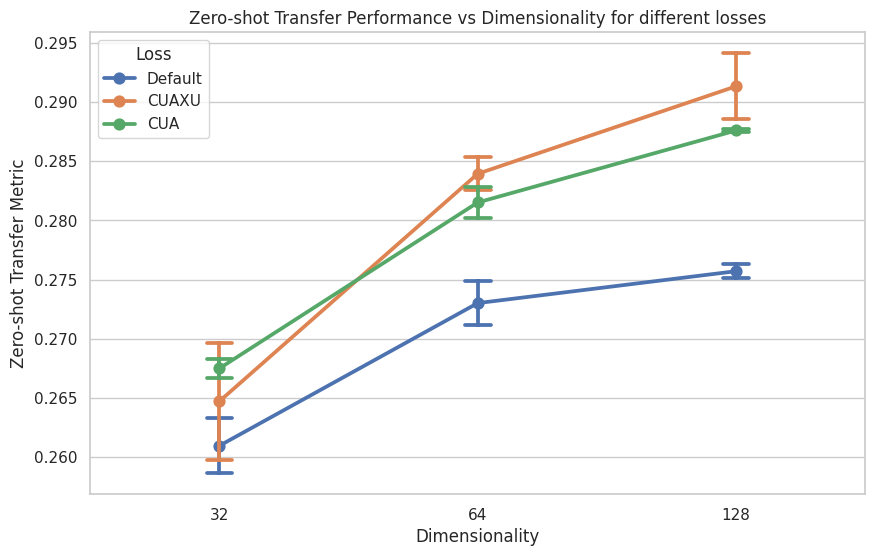

In [38]:
# do a pointplot for acc1 vs dim, with one line for each loss in the same plot
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# sns.pointplot(data=df_imagenet, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar=('se', 0), palette='deep', capsize=.1)
# sns.pointplot(data=df, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar=('se', 0), palette='deep', capsize=.1)



# sns.pointplot(data=df_filtered, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar=('se', 1), palette='deep', capsize=.1)
sns.pointplot(data=df_filtered_accs, x='dim', y='acc_metric', hue='loss_name', ax=ax, errorbar=('se', 1), palette='deep', capsize=.1)



# change colors assigned to each loss



# change legend title
plt.legend(title='Loss')




# sns.pointplot(data=df_imagenet, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar='pi', palette='deep', capsize=.1)
# sns.pointplot(data=df_imagenet, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar='ci', palette='deep', capsize=.1)

plt.title('Zero-shot Transfer Performance vs Dimensionality for different losses')
plt.xlabel('Dimensionality')
plt.ylabel('Zero-shot Transfer Metric')

plt.savefig(f'/home/afahim2/tmp/clip-project/clipverse/figures/zs_img_acc_dims.png')
plt.show()



### MSCOCO i-t retreival plot

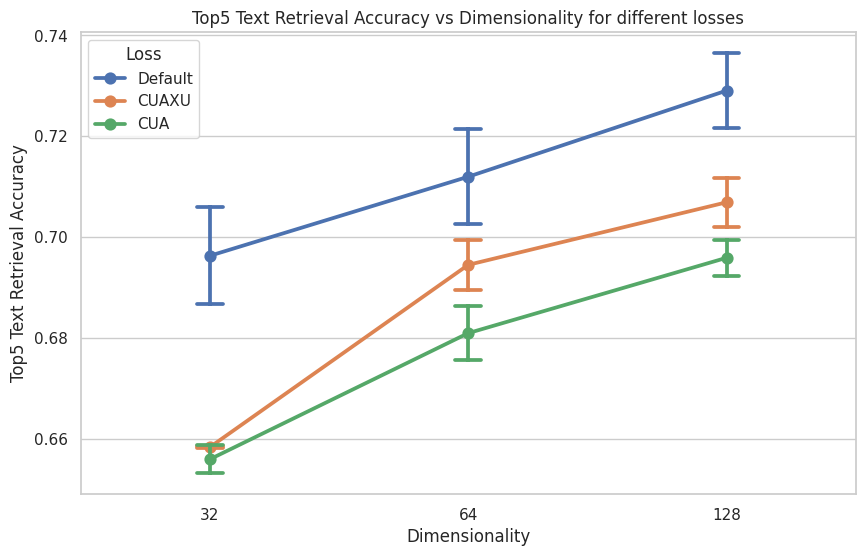

In [32]:
# do a pointplot for acc1 vs dim, with one line for each loss in the same plot
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# sns.pointplot(data=df_imagenet, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar=('se', 0), palette='deep', capsize=.1)
# sns.pointplot(data=df, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar=('se', 0), palette='deep', capsize=.1)



# sns.pointplot(data=df_filtered, x='dim', y='image_retrieval_recall@5', hue='loss_name', ax=ax, errorbar=('se', 1), palette='deep', capsize=.1)
sns.pointplot(data=df_filtered, x='dim', y='text_retrieval_recall@5', hue='loss_name', ax=ax, errorbar=('se', 1), palette='deep', capsize=.1)
# sns.pointplot(data=df_filtered_accs, x='dim', y='acc_metric', hue='loss_name', ax=ax, errorbar=('se', 1), palette='deep', capsize=.1)



# change colors assigned to each loss



# change legend title
plt.legend(title='Loss')




# sns.pointplot(data=df_imagenet, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar='pi', palette='deep', capsize=.1)
# sns.pointplot(data=df_imagenet, x='dim', y='acc1', hue='loss_name', ax=ax, errorbar='ci', palette='deep', capsize=.1)

# plt.title('Top5 Image Retrieval Accuracy vs Dimensionality for different losses')
plt.title('Top5 Text Retrieval Accuracy vs Dimensionality for different losses')
plt.xlabel('Dimensionality')
# plt.ylabel('Top5 Image Retrieval Accuracy')
plt.ylabel('Top5 Text Retrieval Accuracy')

# plt.savefig(f'/home/afahim2/tmp/clip-project/clipverse/figures/top5_image_retrieval_accuracy_vs_dim.png')
plt.savefig(f'/home/afahim2/tmp/clip-project/clipverse/figures/top5_text_retrieval_accuracy_vs_dim.png')
plt.show()

